In [1]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [2]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [3]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [4]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [5]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [6]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [7]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [8]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [9]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [10]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [11]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [12]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [13]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [14]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [15]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [16]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [17]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [18]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [21]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [22]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [23]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [24]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [25]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [26]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0,0.017038,0.021552,0.033042
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0,0.001408,0.001087,0.020096
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2,0.028268,0.551958,0.275132
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2,0.287609,0.091397,0.292291


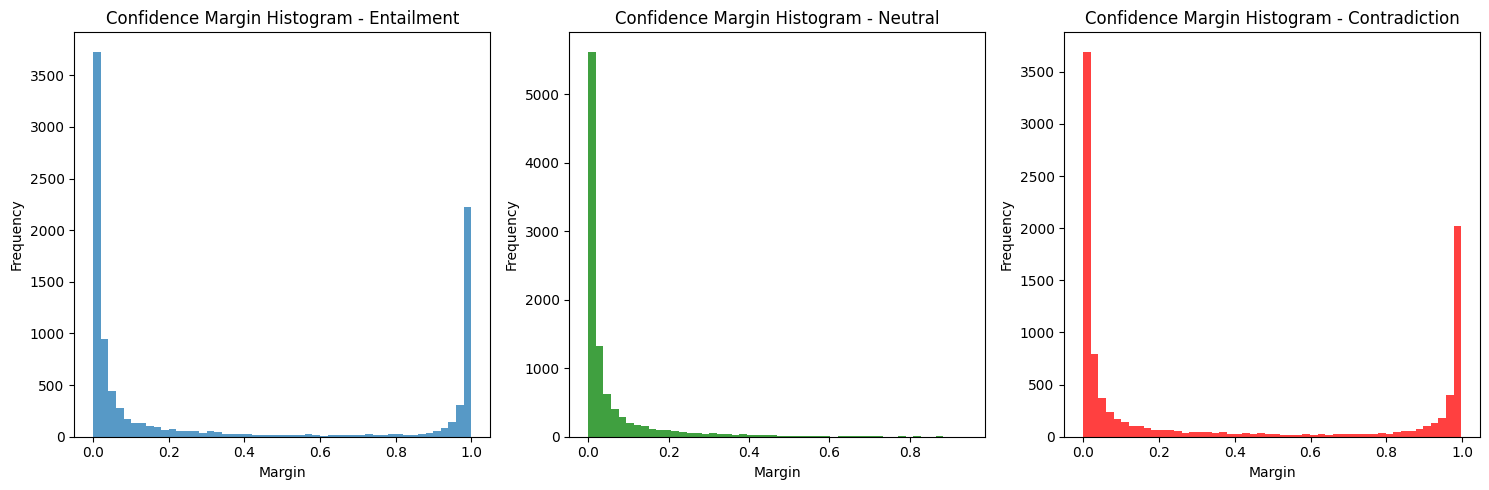

In [27]:
import matplotlib.pyplot as plt

# Plot histograms for the confidence margins
def plot_confidence_margins(df):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(df['confidence_margin_entailment'], bins=50, alpha=0.75, label='Entailment')
    plt.title('Confidence Margin Histogram - Entailment')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(df['confidence_margin_neutral'], bins=50, alpha=0.75, label='Neutral', color='green')
    plt.title('Confidence Margin Histogram - Neutral')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(df['confidence_margin_contradiction'], bins=50, alpha=0.75, label='Contradiction', color='red')
    plt.title('Confidence Margin Histogram - Contradiction')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_confidence_margins(combined_snli_df)


In [28]:
# Define thresholds based on the distribution
confidence_threshold = 0.8

# Apply threshold and create a new copy of the DataFrame
high_confidence_snli = combined_snli_df[
    (combined_snli_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_snli_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_snli_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()


# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_matched = combined_mnli_matched_df[
    (combined_mnli_matched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_matched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_matched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_mismatched = combined_mnli_mismatched_df[
    (combined_mnli_mismatched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_mismatched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_mismatched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 1
high_confidence_anli_r1 = combined_anli_r1_df[
    (combined_anli_r1_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r1_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r1_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 2
high_confidence_anli_r2 = combined_anli_r2_df[
    (combined_anli_r2_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r2_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r2_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 3
high_confidence_anli_r3 = combined_anli_r3_df[
    (combined_anli_r3_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r3_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r3_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

In [29]:
# Majority vote logic with weights for numeric labels
def majority_vote_with_threshold(row):
    votes = [0, 0, 0]  # Index 0 for entailment, 1 for neutral, 2 for contradiction
    if row['confidence_margin_entailment'] >= confidence_threshold:
        votes[0] += row['confidence_margin_entailment']
    if row['confidence_margin_neutral'] >= confidence_threshold:
        votes[1] += row['confidence_margin_neutral']
    if row['confidence_margin_contradiction'] >= confidence_threshold:
        votes[2] += row['confidence_margin_contradiction']
    
    # Return the index of the highest vote
    return np.argmax(votes)

# Apply the majority vote logic using .loc
high_confidence_snli.loc[:, 'majority_vote'] = high_confidence_snli.apply(majority_vote_with_threshold, axis=1)
# Apply the majority vote logic using .loc
high_confidence_mnli_matched.loc[:, 'majority_vote'] = high_confidence_mnli_matched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_mnli_mismatched.loc[:, 'majority_vote'] = high_confidence_mnli_mismatched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r1.loc[:, 'majority_vote'] = high_confidence_anli_r1.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r2.loc[:, 'majority_vote'] = high_confidence_anli_r2.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r3.loc[:, 'majority_vote'] = high_confidence_anli_r3.apply(majority_vote_with_threshold, axis=1)


In [30]:
high_confidence_anli_r3

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515,1
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120,2
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189,0
5,0.002461,0.150678,0.846861,0.999220,0.000554,0.000227,0.985221,0.014745,0.000034,0,0.013998,0.135933,0.846635,2
8,0.131793,0.776056,0.092151,0.000384,0.002570,0.997046,0.049409,0.904356,0.046236,0,0.082384,0.128299,0.904895,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.957103,0.040533,0.002363,0.000066,0.000316,0.999618,0.009265,0.016116,0.974619,2,0.947838,0.024417,0.024999,0
1194,0.945850,0.052813,0.001337,0.000607,0.000853,0.998540,0.000205,0.000291,0.999504,2,0.945243,0.051960,0.000965,0
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379,0
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452,2


In [31]:
high_confidence_mnli_mismatched

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2,0.998773,0.003385,0.004211,0
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2,0.991698,0.008714,0.014951,0
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0,0.011021,0.011334,0.992721,2
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2,0.825931,0.525168,0.526413,0
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0,0.009215,0.010844,0.993904,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.000760,0.013837,0.985402,0.972984,0.025382,0.001634,0.925212,0.069991,0.004798,0,0.047772,0.044608,0.980605,2
9825,0.000145,0.003906,0.995949,0.952827,0.045891,0.001281,0.965645,0.032757,0.001598,0,0.012818,0.013134,0.994351,2
9826,0.996226,0.003656,0.000118,0.000353,0.104717,0.894930,0.004991,0.039946,0.955062,2,0.991234,0.064771,0.060132,0
9828,0.997044,0.001226,0.001730,0.000364,0.000717,0.998919,0.019078,0.039258,0.941663,2,0.977966,0.038033,0.057256,0


In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = high_confidence_snli.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_snli = high_confidence_snli['True_Label'].values

# Features and Labels
X_mnli_matched = high_confidence_mnli_matched.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_mnli_matched = high_confidence_mnli_matched['True_Label'].values

# Features and Labels
X_mnli_mismatched = high_confidence_mnli_mismatched.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_mnli_mismatched = high_confidence_mnli_mismatched['True_Label'].values

# Features and Labels
X_anli_r1 = high_confidence_anli_r1.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_anli_r1 = high_confidence_anli_r1['True_Label'].values

# Features and Labels
X_anli_r2 = high_confidence_anli_r2.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_anli_r2 = high_confidence_anli_r2['True_Label'].values

# Features and Labels
X_anli_r3 = high_confidence_anli_r3.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_anli_r3 = high_confidence_anli_r3['True_Label'].values


2024-04-19 14:48:30.604728: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 14:48:30.604838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 14:48:30.756561: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [33]:
# Extract only the additional features from each dataset
features_snli = high_confidence_snli[['confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_mnli_matched = high_confidence_mnli_matched[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_mnli_mismatched = high_confidence_mnli_mismatched[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_anli_r1 = high_confidence_anli_r1[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_anli_r2 = high_confidence_anli_r2[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_anli_r3 = high_confidence_anli_r3[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values


In [34]:
X_snli

array([[9.9878270e-01, 7.6433434e-04, 4.5297167e-04, ..., 4.6765395e-03,
        6.0480673e-02, 9.3484277e-01],
       [5.0442386e-04, 4.3001700e-03, 9.9519530e-01, ..., 9.7817034e-01,
        2.1051416e-02, 7.7824460e-04],
       [9.8957914e-01, 5.4418677e-03, 4.9790350e-03, ..., 8.5550435e-02,
        7.5036585e-02, 8.3941300e-01],
       ...,
       [7.0376875e-04, 9.7931010e-03, 9.8950315e-01, ..., 8.9463750e-01,
        1.0409502e-01, 1.2674012e-03],
       [9.9917114e-01, 4.9286430e-04, 3.3603658e-04, ..., 8.3751883e-04,
        2.6697412e-03, 9.9649280e-01],
       [2.6664520e-04, 2.1777824e-03, 9.9755560e-01, ..., 9.8434700e-01,
        1.5223468e-02, 4.2961346e-04]])

In [35]:
features_snli

array([[9.94106161e-01, 5.59870956e-02, 6.04100800e-02],
       [5.73736000e-03, 5.89017100e-03, 9.94264296e-01],
       [9.04028705e-01, 1.89172950e-02, 3.66324000e-02],
       ...,
       [1.13691360e-01, 1.12957690e-01, 9.87502096e-01],
       [9.98333621e-01, 1.90469200e-03, 2.68793000e-03],
       [9.45200000e-04, 6.61004000e-04, 9.96841898e-01]])

In [37]:
# Flatten the data for FCNN for each dataset correctly
X_snli_fcnn = X_snli.reshape(X_snli.shape[0], -1)  # Reshaping SNLI data by flattening
X_mnli_matched_fcnn = X_mnli_matched.reshape(X_mnli_matched.shape[0], -1)  # Reshaping MNLI-matched data by flattening
X_mnli_mismatched_fcnn = X_mnli_mismatched.reshape(X_mnli_mismatched.shape[0], -1)  # Reshaping MNLI-mismatched data by flattening
X_anli_r1_fcnn = X_anli_r1.reshape(X_anli_r1.shape[0], -1)  # Reshaping ANLI Round 1 data by flattening
X_anli_r2_fcnn = X_anli_r2.reshape(X_anli_r2.shape[0], -1)  # Reshaping ANLI Round 2 data by flattening
X_anli_r3_fcnn = X_anli_r3.reshape(X_anli_r3.shape[0], -1)  # Reshaping ANLI Round 3 data by flattening


In [39]:
# Reshape feature arrays to match their own dataset's shape
features_snli = features_snli.reshape(features_snli.shape[0], -1)  # No change needed, correct for its own size
features_mnli_matched = features_mnli_matched.reshape(features_mnli_matched.shape[0], -1)  # Correct for MNLI-matched
features_mnli_mismatched = features_mnli_mismatched.reshape(features_mnli_mismatched.shape[0], -1)  # Correct for MNLI-mismatched
features_anli_r1 = features_anli_r1.reshape(features_anli_r1.shape[0], -1)  # Correct for ANLI Round 1
features_anli_r2 = features_anli_r2.reshape(features_anli_r2.shape[0], -1)  # Correct for ANLI Round 2
features_anli_r3 = features_anli_r3.reshape(features_anli_r3.shape[0], -1)  # Correct for ANLI Round 3


In [42]:
# One-hot encode labels
y_encoded_snli = tf.keras.utils.to_categorical(y_snli)
# One-hot encode labels
y_encoded_mnli_matched = tf.keras.utils.to_categorical(y_mnli_matched)
# One-hot encode labels
y_encoded_mnli_mismatched = tf.keras.utils.to_categorical(y_mnli_mismatched)
# One-hot encode labels
y_encoded_anli_r1 = tf.keras.utils.to_categorical(y_anli_r1)
# One-hot encode labels
y_encoded_anli_r2 = tf.keras.utils.to_categorical(y_anli_r2)
# One-hot encode labels
y_encoded_anli_r3 = tf.keras.utils.to_categorical(y_anli_r3)

In [43]:
from sklearn.model_selection import train_test_split

# Function to prepare data splits, same function can be used as earlier
def prepare_data_splits(X, features, y_encoded, test_size=0.1, random_state=42):
    X_train, X_val, y_train, y_val = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded)
    features_train, features_val, _, _ = train_test_split(
        features, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded)
    return X_train, X_val, features_train, features_val, y_train, y_val

# Prepare data splits for FCNN
X_train_snli_fcnn, X_val_snli_fcnn, features_train_snli, features_val_snli, y_train_snli, y_val_snli = prepare_data_splits(X_snli_fcnn, features_snli, y_encoded_snli)
# Prepare data splits for MNLI Matched
X_train_mnli_matched_fcnn, X_val_mnli_matched_fcnn, features_train_mnli_matched, features_val_mnli_matched, y_train_mnli_matched, y_val_mnli_matched = prepare_data_splits(X_mnli_matched_fcnn, features_mnli_matched, y_encoded_mnli_matched)

# Prepare data splits for MNLI Mismatched
X_train_mnli_mismatched_fcnn, X_val_mnli_mismatched_fcnn, features_train_mnli_mismatched, features_val_mnli_mismatched, y_train_mnli_mismatched, y_val_mnli_mismatched = prepare_data_splits(X_mnli_mismatched_fcnn, features_mnli_mismatched, y_encoded_mnli_mismatched)

# Prepare data splits for ANLI Round 1
X_train_anli_r1_fcnn, X_val_anli_r1_fcnn, features_train_anli_r1, features_val_anli_r1, y_train_anli_r1, y_val_anli_r1 = prepare_data_splits(X_anli_r1_fcnn, features_anli_r1, y_encoded_anli_r1)

# Prepare data splits for ANLI Round 2
X_train_anli_r2_fcnn, X_val_anli_r2_fcnn, features_train_anli_r2, features_val_anli_r2, y_train_anli_r2, y_val_anli_r2 = prepare_data_splits(X_anli_r2_fcnn, features_anli_r2, y_encoded_anli_r2)

# Prepare data splits for ANLI Round 3
X_train_anli_r3_fcnn, X_val_anli_r3_fcnn, features_train_anli_r3, features_val_anli_r3, y_train_anli_r3, y_val_anli_r3 = prepare_data_splits(X_anli_r3_fcnn, features_anli_r3, y_encoded_anli_r3)


In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,  LSTM, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten


# Build and train FCNN model
def build_and_train_fcnn_model(X_train, features_train, y_train, X_val, features_val, y_val, epochs=20, batch_size=32):
    input_shape = X_train.shape[1:]
    features_input_shape = features_train.shape[1:]

    main_input = Input(shape=input_shape, name='main_input')
    x = Dense(128, activation='relu')(main_input)
    x = Dropout(0.5)(x)

    features_input = Input(shape=features_input_shape, name='features_input')
    x_features = Dense(32, activation='relu')(features_input)
    x_features = Dropout(0.2)(x_features)

    concatenated = Concatenate()([x, x_features])
    output = Dense(3, activation='softmax')(concatenated)

    model = Model(inputs=[main_input, features_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(
        [X_train, features_train], y_train,
        validation_data=([X_val, features_val], y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping]
    )

    evaluation = model.evaluate([X_val, features_val], y_val, verbose=1)
    return model, history, evaluation



In [45]:
# Training and evaluation for the SNLI data with FCNN
model_snli_fcnn, history_snli_fcnn, evaluation_snli_fcnn = build_and_train_fcnn_model(
    X_train_snli_fcnn, features_train_snli, y_train_snli, 
    X_val_snli_fcnn, features_val_snli, y_val_snli, 
    epochs=20, batch_size=32
)

print("Evaluation on SNLI Validation Data with FCNN:", evaluation_snli_fcnn)
print("History keys:", history_snli_fcnn.history.keys())

Epoch 1/20
 94/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7854 - loss: 0.6898

I0000 00:00:1713538527.924531      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8446 - loss: 0.5430 - val_accuracy: 0.9536 - val_loss: 0.1431
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9550 - loss: 0.1664 - val_accuracy: 0.9619 - val_loss: 0.1216
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9582 - loss: 0.1539 - val_accuracy: 0.9652 - val_loss: 0.1189
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9593 - loss: 0.1483 - val_accuracy: 0.9652 - val_loss: 0.1186
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.1411 - val_accuracy: 0.9652 - val_loss: 0.1175
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9635 - loss: 0.1372 - val_accuracy: 0.9636 - val_loss: 0.1186
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.1348 - val_accuracy: 0.9619 - val_loss: 0.1190
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9631 - loss: 0.1316 - val_accuracy: 0.9636 - val

In [46]:
# Training and evaluation for MNLI Matched with FCNN
model_mnli_matched_fcnn, history_mnli_matched_fcnn, evaluation_mnli_matched_fcnn = build_and_train_fcnn_model(
    X_train_mnli_matched_fcnn, features_train_mnli_matched, y_train_mnli_matched, 
    X_val_mnli_matched_fcnn, features_val_mnli_matched, y_val_mnli_matched, 
    epochs=20, batch_size=32
)
print("Evaluation on MNLI Matched Validation Data with FCNN:", evaluation_mnli_matched_fcnn)


Epoch 1/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.8301 - loss: 0.5447 - val_accuracy: 0.9659 - val_loss: 0.1469
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9643 - loss: 0.1544 - val_accuracy: 0.9659 - val_loss: 0.1327
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9672 - loss: 0.1356 - val_accuracy: 0.9693 - val_loss: 0.1275
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9644 - loss: 0.1509 - val_accuracy: 0.9693 - val_loss: 0.1252
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 0.1379 - val_accuracy: 0.9693 - val_loss: 0.1267
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9616 - loss: 0.1481 - val_accuracy: 0.9693 - val_loss: 0.1255
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9696 - loss: 0.1224 - val_accuracy: 0.9693 - val_loss: 0.1245
Epoch 8/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9628 - loss: 0.1465 - val_accuracy: 0

In [47]:
# Training and evaluation for MNLI Mismatched with FCNN
model_mnli_mismatched_fcnn, history_mnli_mismatched_fcnn, evaluation_mnli_mismatched_fcnn = build_and_train_fcnn_model(
    X_train_mnli_mismatched_fcnn, features_train_mnli_mismatched, y_train_mnli_mismatched, 
    X_val_mnli_mismatched_fcnn, features_val_mnli_mismatched, y_val_mnli_mismatched, 
    epochs=20, batch_size=32
)
print("Evaluation on MNLI Mismatched Validation Data with FCNN:", evaluation_mnli_mismatched_fcnn)


Epoch 1/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8757 - loss: 0.5302 - val_accuracy: 0.9628 - val_loss: 0.1601
Epoch 2/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.1337 - val_accuracy: 0.9628 - val_loss: 0.1523
Epoch 3/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1392 - val_accuracy: 0.9645 - val_loss: 0.1518
Epoch 4/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9717 - loss: 0.1174 - val_accuracy: 0.9628 - val_loss: 0.1518
Epoch 5/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9692 - loss: 0.1081 - val_accuracy: 0.9577 - val_loss: 0.1506
Epoch 6/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9620 - loss: 0.1483 - val_accuracy: 0.9628 - val_loss: 0.1544
Epoch 7/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.1173 - val_accuracy: 0.9628 - val_loss: 0.1493
Epoch 8/20
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.1174 - val_accuracy: 0

In [48]:
# Training and evaluation for ANLI Round 1 with FCNN
model_anli_r1_fcnn, history_anli_r1_fcnn, evaluation_anli_r1_fcnn = build_and_train_fcnn_model(
    X_train_anli_r1_fcnn, features_train_anli_r1, y_train_anli_r1, 
    X_val_anli_r1_fcnn, features_val_anli_r1, y_val_anli_r1, 
    epochs=20, batch_size=32
)
print("Evaluation on ANLI Round 1 Validation Data with FCNN:", evaluation_anli_r1_fcnn)


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 346ms/step - accuracy: 0.4781 - loss: 1.0479 - val_accuracy: 0.7442 - val_loss: 0.8968
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6913 - loss: 0.9108 - val_accuracy: 0.6744 - val_loss: 0.7776
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7467 - loss: 0.7685 - val_accuracy: 0.6977 - val_loss: 0.6951
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8012 - loss: 0.6837 - val_accuracy: 0.6977 - val_loss: 0.6404
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7656 - loss: 0.6630 - val_accuracy: 0.6977 - val_loss: 0.6034
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8195 - loss: 0.5829 - val_accuracy: 0.7209 - val_loss: 0.5777
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8082 - loss: 0.5565 - val_accuracy: 0.7442 - val_loss: 0.5609
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8096 - loss: 0.5564 - val_accuracy: 0.7442 - val_los

In [49]:
# Training and evaluation for ANLI Round 2 with FCNN
model_anli_r2_fcnn, history_anli_r2_fcnn, evaluation_anli_r2_fcnn = build_and_train_fcnn_model(
    X_train_anli_r2_fcnn, features_train_anli_r2, y_train_anli_r2, 
    X_val_anli_r2_fcnn, features_val_anli_r2, y_val_anli_r2, 
    epochs=20, batch_size=32
)
print("Evaluation on ANLI Round 2 Validation Data with FCNN:", evaluation_anli_r2_fcnn)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 320ms/step - accuracy: 0.4027 - loss: 1.0870 - val_accuracy: 0.6889 - val_loss: 0.9757
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6287 - loss: 0.9574 - val_accuracy: 0.6889 - val_loss: 0.9062
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6351 - loss: 0.8893 - val_accuracy: 0.6889 - val_loss: 0.8535
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6312 - loss: 0.8502 - val_accuracy: 0.6667 - val_loss: 0.8091
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6887 - loss: 0.7975 - val_accuracy: 0.6889 - val_loss: 0.7771
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7094 - loss: 0.7559 - val_accuracy: 0.7333 - val_loss: 0.7480
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7216 - loss: 0.7276 - val_accuracy: 0.7556 - val_loss: 0.7292
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7091 - loss: 0.7107 - val_accuracy: 0.7556 - val_los

In [50]:
# Training and evaluation for ANLI Round 3 with FCNN
model_anli_r3_fcnn, history_anli_r3_fcnn, evaluation_anli_r3_fcnn = build_and_train_fcnn_model(
    X_train_anli_r3_fcnn, features_train_anli_r3, y_train_anli_r3, 
    X_val_anli_r3_fcnn, features_val_anli_r3, y_val_anli_r3, 
    epochs=20, batch_size=32
)
print("Evaluation on ANLI Round 3 Validation Data with FCNN:", evaluation_anli_r3_fcnn)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step - accuracy: 0.2831 - loss: 1.1191 - val_accuracy: 0.6038 - val_loss: 0.9916
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6362 - loss: 0.9516 - val_accuracy: 0.6981 - val_loss: 0.8822
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6695 - loss: 0.8687 - val_accuracy: 0.6981 - val_loss: 0.8122
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6867 - loss: 0.8058 - val_accuracy: 0.6981 - val_loss: 0.7673
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6736 - loss: 0.7568 - val_accuracy: 0.6792 - val_loss: 0.7349
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.7128 - val_accuracy: 0.6792 - val_loss: 0.7161
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7429 - loss: 0.6911 - val_accuracy: 0.6792 - val_loss: 0.7042
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - loss: 0.7049 - val_accuracy: 0.6792 - val_los

In [51]:
# Combine all datasets for FCNN
X_fcnn_all_tasks = np.concatenate([
    X_snli_fcnn, X_mnli_matched_fcnn, X_mnli_mismatched_fcnn,
    X_anli_r1_fcnn, X_anli_r2_fcnn, X_anli_r3_fcnn
])

features_all_tasks = np.concatenate([
    features_snli, features_mnli_matched, features_mnli_mismatched,
    features_anli_r1, features_anli_r2, features_anli_r3
])

y_encoded_all_tasks = np.concatenate([
    y_encoded_snli, y_encoded_mnli_matched, y_encoded_mnli_mismatched,
    y_encoded_anli_r1, y_encoded_anli_r2, y_encoded_anli_r3
])

# Prepare data splits for the combined dataset
X_train_all_fcnn, X_val_all_fcnn, features_train_all, features_val_all, y_train_all, y_val_all = prepare_data_splits(
    X_fcnn_all_tasks, features_all_tasks, y_encoded_all_tasks
)
# Function to build and train the FCNN model
def build_and_train_fcnn_model(X_train, features_train, y_train, X_val, features_val, y_val, epochs=20, batch_size=32):
    input_shape = X_train.shape[1:]
    features_input_shape = features_train.shape[1:]

    main_input = Input(shape=input_shape, name='main_input')
    x = Dense(128, activation='relu')(main_input)
    x = Dropout(0.5)(x)

    features_input = Input(shape=features_input_shape, name='features_input')
    x_features = Dense(32, activation='relu')(features_input)
    x_features = Dropout(0.2)(x_features)

    concatenated = Concatenate()([x, x_features])
    output = Dense(3, activation='softmax')(concatenated)

    model = Model(inputs=[main_input, features_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(
        [X_train, features_train], y_train,
        validation_data=([X_val, features_val], y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping]
    )

    evaluation = model.evaluate([X_val, features_val], y_val, verbose=1)
    return model, history, evaluation

# Train and evaluate the FCNN model using the combined data from all tasks
model_all_fcnn, history_all_fcnn, evaluation_all_fcnn = build_and_train_fcnn_model(
    X_train_all_fcnn, features_train_all, y_train_all,
    X_val_all_fcnn, features_val_all, y_val_all,
    epochs=20, batch_size=32
)

print("Evaluation on All Tasks Validation Data with FCNN:", evaluation_all_fcnn)
print("History keys:", history_all_fcnn.history.keys())


Epoch 1/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9065 - loss: 0.3530 - val_accuracy: 0.9458 - val_loss: 0.1715
Epoch 2/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9514 - loss: 0.1747 - val_accuracy: 0.9474 - val_loss: 0.1713
Epoch 3/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1816 - val_accuracy: 0.9464 - val_loss: 0.1707
Epoch 4/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.1821 - val_accuracy: 0.9453 - val_loss: 0.1703
Epoch 5/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1764 - val_accuracy: 0.9479 - val_loss: 0.1687
Epoch 6/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9512 - loss: 0.1668 - val_accuracy: 0.9474 - val_loss: 0.1690
Epoch 7/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9482 - loss: 0.1692 - val_accuracy: 0.9474 - val_loss: 0.1685
Epoch 8/20
540/540 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1780 - val_accuracy: 0.

In [53]:
# After training the model
model_all_fcnn.save('FCNN_feature_ensemble.h5')  # Saves the model in HDF5 format


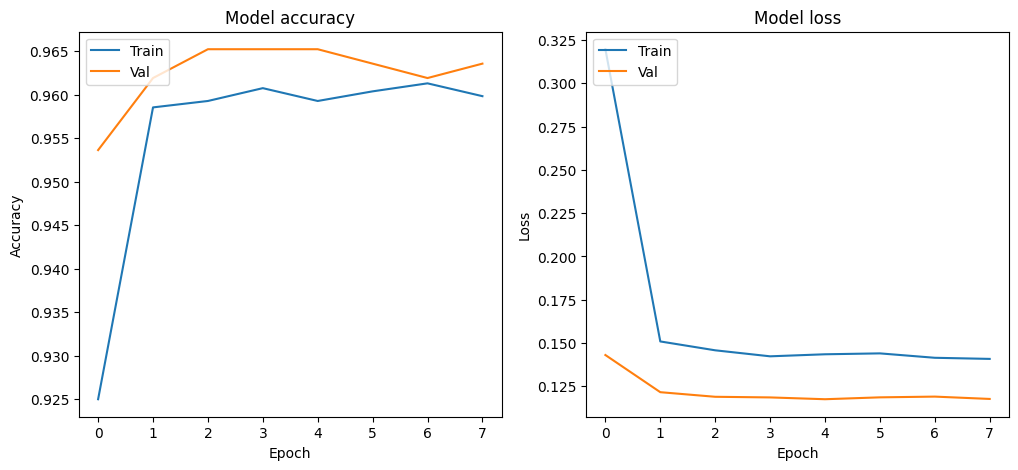

In [54]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_snli_fcnn)


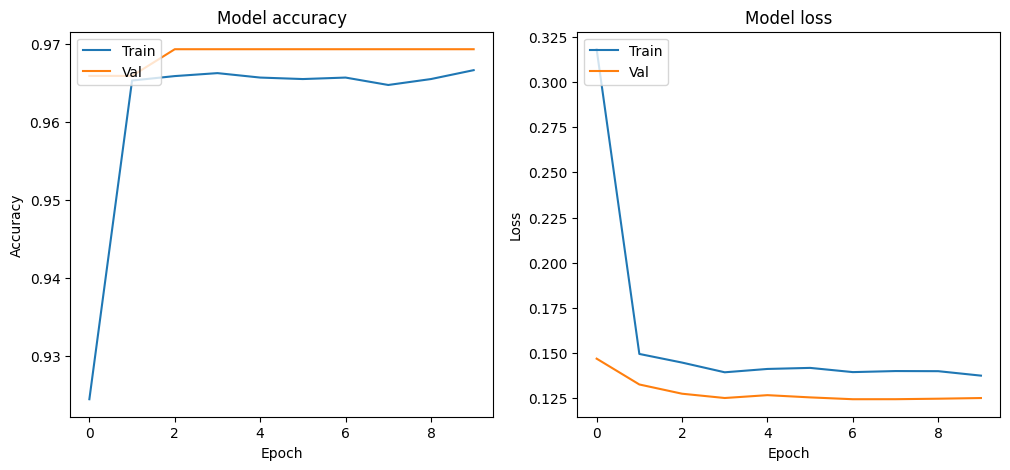

In [55]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_mnli_matched_fcnn)


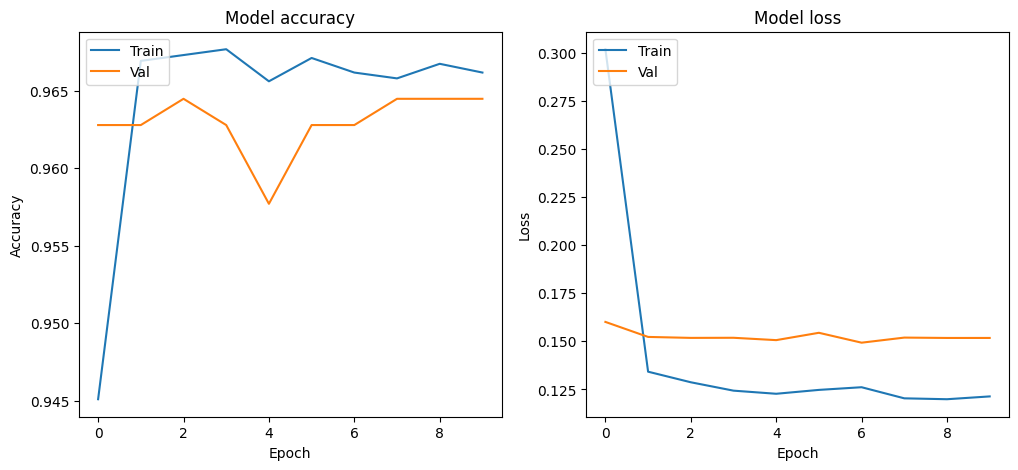

In [56]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_mnli_mismatched_fcnn)


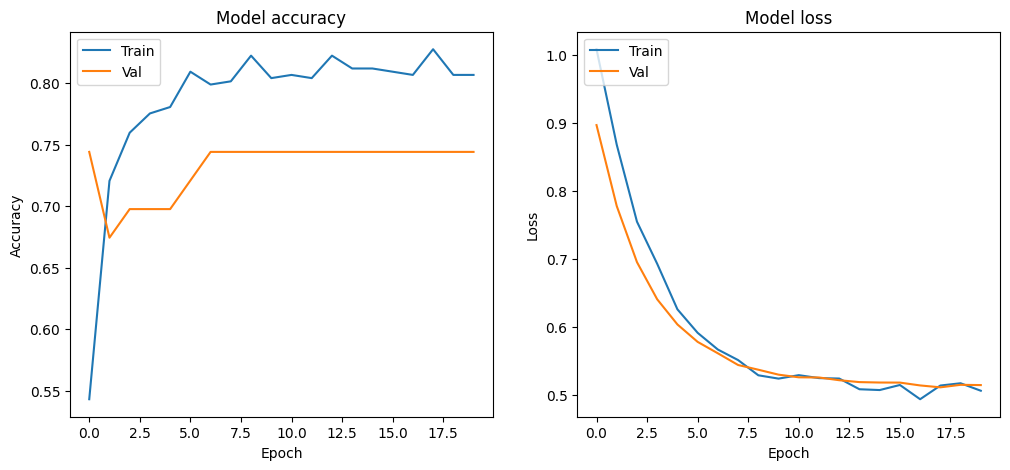

In [57]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r1_fcnn)


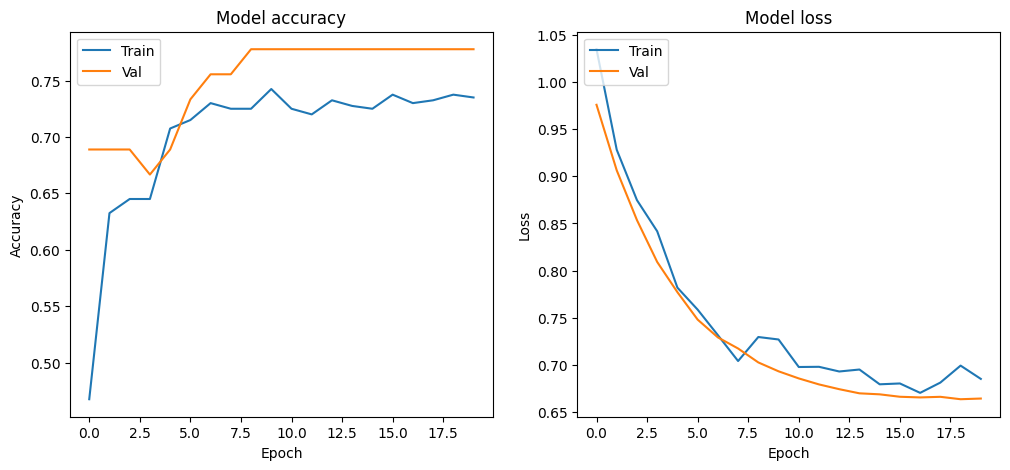

In [58]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r2_fcnn)


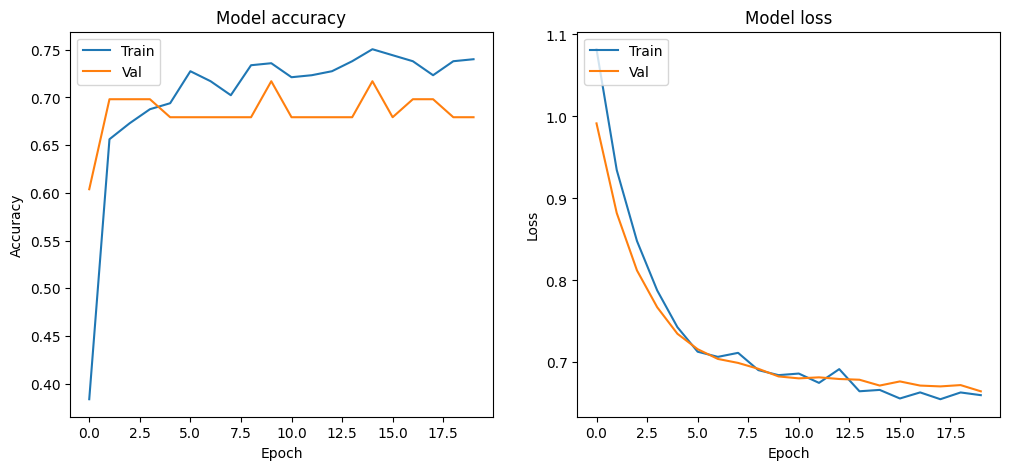

In [59]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r3_fcnn)


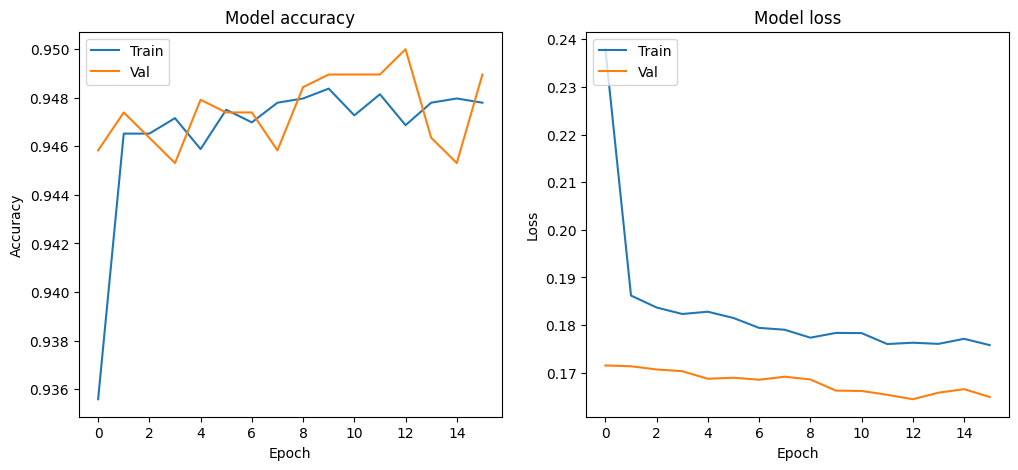

In [60]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_all_fcnn)


In [61]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Concatenate, Flatten
from tensorflow.keras.models import Model

from sklearn.model_selection import StratifiedKFold

def cross_validate_fcnn_model(X, features, y_encoded, num_folds=5):
    # Convert labels to single integers for stratified split
    y_single = np.argmax(y_encoded, axis=1)
    kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    fold_no = 1
    acc_per_fold = []
    loss_per_fold = []
    histories = []  # List to store history for each fold

    for train, test in kfold.split(X, y_single):
        X_train, X_test = X[train], X[test]
        features_train, features_test = features[train], features[test]
        y_train, y_test = y_encoded[train], y_encoded[test]

        # Create FCNN model
        model = create_fcnn_model(X_train.shape[1:], features_train.shape[1:])

        print(f'Training on fold {fold_no}...')
        history = model.fit([X_train, features_train], y_train, epochs=20, batch_size=32, verbose=1, validation_data=([X_test, features_test], y_test))
        histories.append(history)

        scores = model.evaluate([X_test, features_test], y_test, verbose=0)
        print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
        acc_per_fold.append(scores[1] * 100)
        loss_per_fold.append(scores[0])

        fold_no += 1

    print('------------------------------------------------------------------------')
    print('Score per fold')
    for i in range(len(acc_per_fold)):
        print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
    print('------------------------------------------------------------------------')
    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
    print(f'> Loss: {np.mean(loss_per_fold)}')
    print('------------------------------------------------------------------------')
    
    return histories



In [63]:
# SNLI Dataset
histories = cross_validate_fcnn_model(X_fcnn, features, y_encoded)

print("Completed cross-validation for SNLI.")


NameError: name 'create_fcnn_model' is not defined

In [137]:
histories_mnli_matched = cross_validate_lstm_model(X_mnli_matched_rnn, features_mnli_matched, y_encoded_mnli_matched)

Training on fold 1...
Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7907 - loss: 0.5820 - val_accuracy: 0.9659 - val_loss: 0.1503
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9613 - loss: 0.1642 - val_accuracy: 0.9684 - val_loss: 0.1364
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9676 - loss: 0.1396 - val_accuracy: 0.9676 - val_loss: 0.1343
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9647 - loss: 0.1354 - val_accuracy: 0.9667 - val_loss: 0.1358
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.1437 - val_accuracy: 0.9667 - val_loss: 0.1351
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9654 - loss: 0.1293 - val_accuracy: 0.9659 - val_loss: 0.1358
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9649 - loss: 0.1408 - val_accuracy: 0.9659 - val_loss: 0.1373
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9689 - loss: 0.

In [66]:
histories_mnli_mismatched = cross_validate_lstm_model(X_mnli_mismatched_rnn, features_mnli_mismatched, y_encoded_mnli_mismatched)

Training on fold 1...
Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7676 - loss: 0.7830 - val_accuracy: 0.9645 - val_loss: 0.1743
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9611 - loss: 0.1775 - val_accuracy: 0.9645 - val_loss: 0.1468
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9676 - loss: 0.1352 - val_accuracy: 0.9645 - val_loss: 0.1409
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9721 - loss: 0.1162 - val_accuracy: 0.9645 - val_loss: 0.1375
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9656 - loss: 0.1310 - val_accuracy: 0.9645 - val_loss: 0.1389
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9616 - loss: 0.1382 - val_accuracy: 0.9645 - val_loss: 0.1373
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9656 - loss: 0.1289 - val_accuracy: 0.9653 - val_loss: 0.1359
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9677 - loss: 0.1

In [67]:
histories_anli_r1 = cross_validate_lstm_model(X_anli_r1_rnn, features_anli_r1, y_encoded_anli_r1)


Training on fold 1...
Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.2884 - loss: 1.1299 - val_accuracy: 0.5000 - val_loss: 1.0527
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4036 - loss: 1.0700 - val_accuracy: 0.6163 - val_loss: 0.9961
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5254 - loss: 1.0186 - val_accuracy: 0.6279 - val_loss: 0.9471
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6759 - loss: 0.9597 - val_accuracy: 0.6163 - val_loss: 0.8991
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6774 - loss: 0.9120 - val_accuracy: 0.6163 - val_loss: 0.8530
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6791 - loss: 0.8544 - val_accuracy: 0.6628 - val_loss: 0.8080
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6661 - loss: 0.8288 - val_accuracy: 0.6977 - val_loss: 0.7666
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7080 - loss: 0.7725 - val_accur

In [68]:
histories_anli_r2 = cross_validate_lstm_model(X_anli_r2_rnn, features_anli_r2, y_encoded_anli_r2)

Training on fold 1...
Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3105 - loss: 1.1085 - val_accuracy: 0.5169 - val_loss: 1.0759
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4708 - loss: 1.0696 - val_accuracy: 0.6629 - val_loss: 1.0307
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5907 - loss: 1.0243 - val_accuracy: 0.6629 - val_loss: 0.9918
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6399 - loss: 0.9884 - val_accuracy: 0.6629 - val_loss: 0.9537
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6433 - loss: 0.9644 - val_accuracy: 0.6742 - val_loss: 0.9132
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6574 - loss: 0.9392 - val_accuracy: 0.6854 - val_loss: 0.8738
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6672 - loss: 0.9136 - val_accuracy: 0.6742 - val_loss: 0.8380
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6543 - loss: 0.9001 - val_accur

In [69]:
histories_anli_r3 = cross_validate_lstm_model(X_anli_r3_rnn, features_anli_r3, y_encoded_anli_r3)


Training on fold 1...
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5480 - loss: 1.0578 - val_accuracy: 0.5660 - val_loss: 1.0308
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6091 - loss: 1.0155 - val_accuracy: 0.5849 - val_loss: 0.9929
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6162 - loss: 0.9634 - val_accuracy: 0.5943 - val_loss: 0.9576
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5888 - loss: 0.9341 - val_accuracy: 0.6038 - val_loss: 0.9247
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6191 - loss: 0.8891 - val_accuracy: 0.6321 - val_loss: 0.8921
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6367 - loss: 0.8551 - val_accuracy: 0.6415 - val_loss: 0.8628
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6317 - loss: 0.8067 - val_accuracy: 0.6604 - val_loss: 0.8356
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6652 - loss: 0.7892 - val_accur

In [70]:
X_rnn_all_tasks = np.concatenate([X_snli_rnn, X_mnli_matched_rnn, X_mnli_mismatched_rnn, X_anli_r1_rnn, X_anli_r2_rnn, X_anli_r3_rnn])
features_all_tasks = np.concatenate([features_snli, features_mnli_matched, features_mnli_mismatched, features_anli_r1, features_anli_r2, features_anli_r3])
y_encoded_all_tasks = np.concatenate([y_encoded_snli, y_encoded_mnli_matched, y_encoded_mnli_mismatched, y_encoded_anli_r1, y_encoded_anli_r2, y_encoded_anli_r3])

# Call the cross-validation function
all_histories = cross_validate_lstm_model(X_rnn_all_tasks, features_all_tasks, y_encoded_all_tasks, num_folds=5)


Training on fold 1...
Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8709 - loss: 0.4975 - val_accuracy: 0.9464 - val_loss: 0.1783
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9444 - loss: 0.1929 - val_accuracy: 0.9464 - val_loss: 0.1749
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9460 - loss: 0.1806 - val_accuracy: 0.9482 - val_loss: 0.1734
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9515 - loss: 0.1736 - val_accuracy: 0.9487 - val_loss: 0.1724
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9487 - loss: 0.1760 - val_accuracy: 0.9495 - val_loss: 0.1728
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9476 - loss: 0.1786 - val_accuracy: 0.9479 - val_loss: 0.1722
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9484 - loss: 0.1783 - val_accuracy: 0.9492 - val_loss: 0.1730
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9468 - loss: 0.1

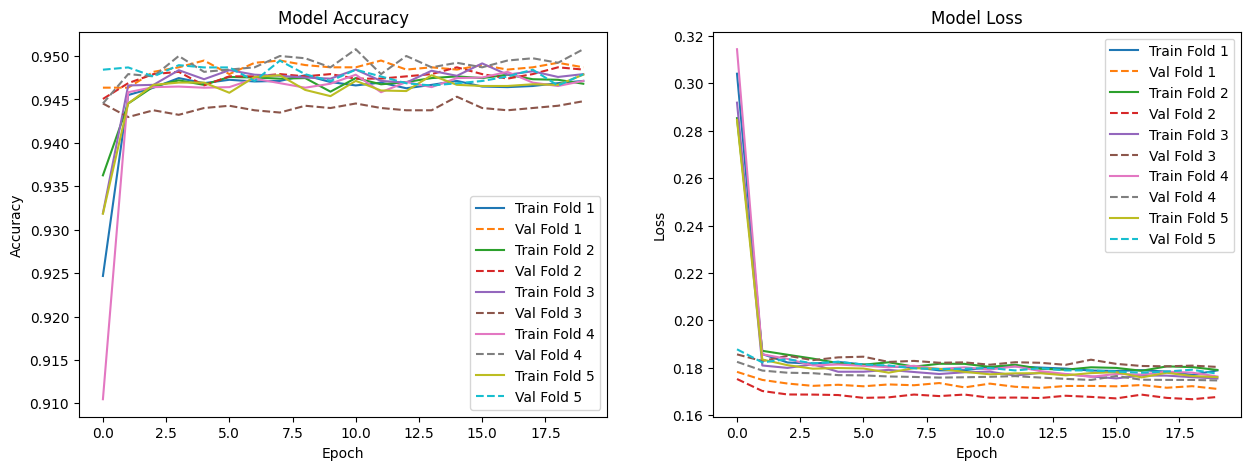

In [71]:
# Function to plot k-fold histories
def plot_kfold_histories(histories):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    for fold, history in enumerate(histories, start=1):
        axes[0].plot(history.history['accuracy'], label=f'Train Fold {fold}')
        axes[0].plot(history.history['val_accuracy'], label=f'Val Fold {fold}', linestyle="--")
        axes[1].plot(history.history['loss'], label=f'Train Fold {fold}')
        axes[1].plot(history.history['val_loss'], label=f'Val Fold {fold}', linestyle="--")
    
    axes[0].set_title('Model Accuracy')
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()
    
    axes[1].set_title('Model Loss')
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend()
    
    plt.show()
    
    
# Plot the histories
plot_kfold_histories(all_histories)
